## 0. Постановка задачи


Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 1. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
! gdown 1GxduArGDpZf7aHyqwfoJbFPZQUqV-kwp

Downloading...
From (original): https://drive.google.com/uc?id=1GxduArGDpZf7aHyqwfoJbFPZQUqV-kwp
From (redirected): https://drive.google.com/uc?id=1GxduArGDpZf7aHyqwfoJbFPZQUqV-kwp&confirm=t&uuid=e62f219e-e5fe-49af-8af9-5b3743a47dc4
To: /content/regression.zip
100% 249M/249M [00:06<00:00, 38.9MB/s]


In [2]:
! unzip /content/regression.zip

Archive:  /content/regression.zip
   creating: regression/
  inflating: regression/osrm_data_train.csv  
   creating: __MACOSX/
   creating: __MACOSX/regression/
  inflating: __MACOSX/regression/._osrm_data_train.csv  
  inflating: regression/.DS_Store    
  inflating: __MACOSX/regression/._.DS_Store  
  inflating: regression/weather_data.csv  
  inflating: __MACOSX/regression/._weather_data.csv  
  inflating: regression/holiday_data.csv  
  inflating: __MACOSX/regression/._holiday_data.csv  
  inflating: regression/regression.ipynb  
  inflating: __MACOSX/regression/._regression.ipynb  
  inflating: regression/train.csv    
  inflating: __MACOSX/regression/._train.csv  
   creating: regression/.ipynb_checkpoints/
  inflating: regression/.ipynb_checkpoints/–≠—В–Ё–+–Њ–љ–љ–Њ–µ —А–µ—И–µ–љ–Є–µ-checkpoint.ipynb  
   creating: __MACOSX/regression/.ipynb_checkpoints/
  inflating: __MACOSX/regression/.ipynb_checkpoints/._–≠—В–Ё–+–Њ–љ–љ–Њ–µ —А–µ—И–µ–љ–Є–µ-checkpoint.ipynb  
  inflating: __MACOS

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.5 MB/s eta 0:00:00


In [4]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import optuna

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn import model_selection
from sklearn import cluster

from sklearn.feature_selection import SelectKBest, f_regression


Прочитаем наш файл с исходными данными:

In [75]:
taxi_data = pd.read_csv('/content/regression/train.csv')
print(taxi_data.shape)
taxi_data.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 1.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [76]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

print('Временные рамки поездок', taxi_data['pickup_datetime'].dt.date.min(), '-', taxi_data['pickup_datetime'].dt.date.max())

Временные рамки поездок 2016-01-01 - 2016-06-30


### Задание 1.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [77]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 1.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [78]:
print('количество уникальных таксопарков в данных:', len(taxi_data['vendor_id'].unique()))
print('максимальное количество пассажиров:', taxi_data['passenger_count'].max())

количество уникальных таксопарков в данных: 2
максимальное количество пассажиров: 9


In [79]:
taxi_data['trip_duration'].describe().round()

count    1458644.0
mean         959.0
std         5237.0
min            1.0
25%          397.0
50%          662.0
75%         1075.0
max      3526282.0
Name: trip_duration, dtype: float64

Средняя и медианная длительность поездки в секундах составляют: 959 и 662 соответственно, минимальное и максимальное время поездки составляют: 1 и 3526282 соответственно

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 1.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [80]:
def add_datetime_features(df):

  df['pickup_date'] = df.pickup_datetime.dt.date
  df['pickup_hour'] = df.pickup_datetime.dt.hour
  df['pickup_day_of_week'] = df.pickup_datetime.dt.day_name()
  return (df)

In [81]:
taxi_data = add_datetime_features(taxi_data)
print('Поездок было совершено в субботу:', len(taxi_data[taxi_data['pickup_day_of_week'] == 'Saturday']))
print('Поездок в среднем совершается в день:',
      round(taxi_data.groupby('pickup_date')['id'].transform('count').mean()))

Поездок было совершено в субботу: 220868
Поездок в среднем совершается в день: 8121


### Задание 1.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [82]:
holiday = pd.read_csv('/content/regression/holiday_data.csv', sep=';')
holiday.head()

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [83]:
# перевод столбцов с датами в datetime
holiday['date'] = pd.to_datetime(holiday['date'])
taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date'])

taxi_data = taxi_data.merge(holiday['date'], how='left', left_on='pickup_date', right_on='date')
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,NaT
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,NaT
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,NaT
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,NaT
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,NaT


In [84]:
def add_holiday_features(df):
  if df['pickup_date'] == df['date']:
    return (1)
  else:
    return (0)

In [85]:
taxi_data['pickup_holiday'] = taxi_data.apply(add_holiday_features, axis=1)
# Удалим вспомогательный столбец 'date'
taxi_data = taxi_data.drop('date', axis=1)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0


In [86]:
taxi_data['pickup_holiday'].value_counts()

pickup_holiday
0    1407522
1      51122
Name: count, dtype: int64

In [87]:
filter = taxi_data.query('pickup_holiday == 1')
print('Медианная длительность поездки на такси в праздничные дни составляет:', round(filter['trip_duration'].median()))

Медианная длительность поездки на такси в праздничные дни составляет: 585


### Задание 1.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [88]:
osrm = pd.read_csv('/content/regression/osrm_data_train.csv')
osrm.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [89]:
#def add_osrm_features(df1, df2):
taxi_data = taxi_data.merge(osrm[['id', 'total_distance', 'total_travel_time', 'number_of_steps']],
                            how='left', on='id')

In [90]:
print('Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM равна:',
      taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())
print('Пропусков в столбцах после объединения таблиц:')
taxi_data.isnull().sum()

Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM равна: 372.5
Пропусков в столбцах после объединения таблиц:


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

### Задание 1.7
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [91]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [92]:
def add_geographical_features(df):

  df['haversine_distance'] = get_haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                                    df['dropoff_latitude'], df['dropoff_longitude'])

  df['direction'] = get_angle_direction(df['pickup_latitude'], df['pickup_longitude'],
                                                    df['dropoff_latitude'], df['dropoff_longitude'])

  return (df)

In [93]:
taxi_data = add_geographical_features(taxi_data)
print('Медианное расстояние Хаверсина поездок (в киллометрах) равно:', round(taxi_data['haversine_distance'].median(), 2))

Медианное расстояние Хаверсина поездок (в киллометрах) равно: 2.09


### Задание 1.8
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [94]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [95]:
def add_cluster_features(df, cluster):
  df['geo_cluster'] = cluster.predict(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
  return (df)

In [96]:
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,Monday,0,2009.1,164.9,5.0,1.498521,99.970196,9
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,Sunday,0,2513.2,332.0,6.0,1.805507,-117.153768,4
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0,6.385098,-159.680165,4
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0,1.485498,-172.737700,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,Saturday,0,1614.9,140.1,5.0,1.188588,179.473585,9


In [97]:
taxi_data['geo_cluster'].value_counts()
print('В наименьшем по размеру географическом кластере поездок содержится:',
      len(taxi_data[taxi_data['geo_cluster'] == taxi_data['geo_cluster'].min()]))

В наименьшем по размеру географическом кластере поездок содержится: 596467


### Задание 1.9
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [98]:
weather = pd.read_csv('/content/regression/weather_data.csv')
print(weather.shape)
weather.info()

(8787, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8787 non-null   object 
 1   temperature  8787 non-null   float64
 2   windchill    2295 non-null   float64
 3   heat index   815 non-null    float64
 4   humidity     8787 non-null   float64
 5   pressure     8556 non-null   float64
 6   dew Point    8787 non-null   float64
 7   visibility   8787 non-null   float64
 8   wind dir     8787 non-null   object 
 9   wind speed   8787 non-null   float64
 10  gust speed   8787 non-null   float64
 11  precip       8787 non-null   float64
 12  events       455 non-null    object 
 13  conditions   8787 non-null   object 
 14  date         8787 non-null   object 
 15  hour         8787 non-null   int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 1.1+ MB


In [99]:
weather.isna().sum()

time              0
temperature       0
windchill      6492
heat index     7972
humidity          0
pressure        231
dew Point         0
visibility        0
wind dir          0
wind speed        0
gust speed        0
precip            0
events         8332
conditions        0
date              0
hour              0
dtype: int64

Видим много пропусков в столбце events. Заполним пропуски словом 'None'

In [100]:
def add_weather_features(df1, df2):
    df2['events'] = df2['events'].fillna('None')

    df2['date'] = pd.to_datetime(df2['date'])
    df1 = df1.merge(df2[['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date', 'hour']],
                    how='left', left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'])
    df1 = df1.drop(['date', 'hour'], axis=1)
    return df1

In [101]:
taxi_data = add_weather_features(taxi_data, weather)

In [102]:
# Сколько поездок было совершено в снежную погоду?
taxi_data['events'].value_counts()

events
None    1375185
Rain      58300
Snow      13126
Fog           1
Name: count, dtype: int64

In [103]:
# Сколько процентов от общего количества наблюдений в таблице с данными
# о поездках занимают пропуски в столбцах с погодными условиями?

round(taxi_data.isna().mean()*100, 2)

id                    0.00
vendor_id             0.00
pickup_datetime       0.00
dropoff_datetime      0.00
passenger_count       0.00
pickup_longitude      0.00
pickup_latitude       0.00
dropoff_longitude     0.00
dropoff_latitude      0.00
store_and_fwd_flag    0.00
trip_duration         0.00
pickup_date           0.00
pickup_hour           0.00
pickup_day_of_week    0.00
pickup_holiday        0.00
total_distance        0.00
total_travel_time     0.00
number_of_steps       0.00
haversine_distance    0.00
direction             0.00
geo_cluster           0.00
temperature           0.82
visibility            0.82
wind speed            0.82
precip                0.82
events                0.82
dtype: float64

## Задание 1.10
Реализуйте функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [104]:
def fill_null_weather_data(df):
    df['temperature'] = df['temperature'].fillna(df.groupby('pickup_date')['temperature'].transform('median'))
    df['visibility'] = df['visibility'].fillna(df.groupby('pickup_date')['visibility'].transform('median'))
    df['wind speed'] = df['wind speed'].fillna(df.groupby('pickup_date')['wind speed'].transform('median'))
    df['precip'] = df['precip'].fillna(df.groupby('pickup_date')['precip'].transform('median'))
    df['events'] = df['events'].fillna('None')

    df['total_distance'] = df['total_distance'].fillna(df['total_distance'].median())
    df['total_travel_time'] = df['total_travel_time'].fillna(df['total_travel_time'].median())
    df['number_of_steps'] = df['number_of_steps'].fillna(df['number_of_steps'].median())

    return df

In [105]:
fill_null_weather_data(taxi_data)
print('После заполнения пропусков медиана в столбце temperature равна', round(taxi_data['temperature'].median(), 1))

После заполнения пропусков медиана в столбце temperature равна 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


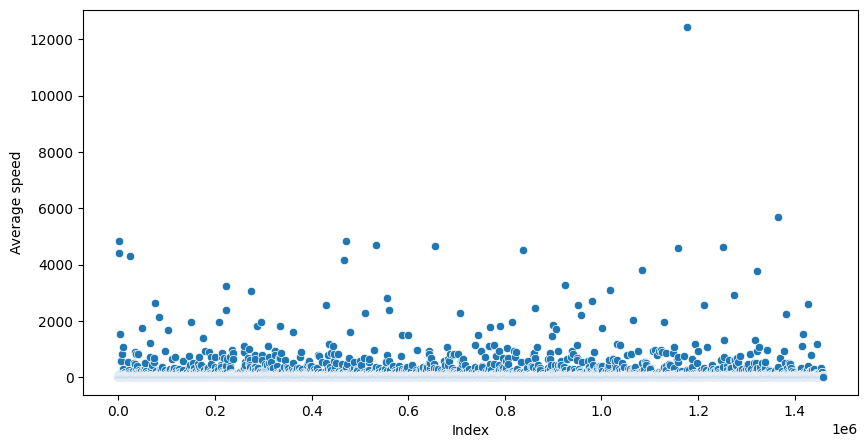

In [106]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 1.11
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [107]:
filter_trip_duration = taxi_data[taxi_data['trip_duration'] > 24*3600]
filter_total_distance = taxi_data[avg_speed >= 300]

# Сколько выбросов по признаку длительности поездки вам удалось найти?
print('Поездки, длительность которых превышает 24 часа:', len(filter_trip_duration))
#Сколько выбросов по признаку скорости вам удалось найти?
print('Поездки, скорость которых превышает 300 км/ч:', len(filter_total_distance))

Поездки, длительность которых превышает 24 часа: 4
Поездки, скорость которых превышает 300 км/ч: 407


In [108]:
taxi_data = taxi_data.drop(filter_trip_duration.index)
taxi_data = taxi_data.drop(filter_total_distance.index)
taxi_data.shape

(1458233, 26)

## 2. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.

Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.

In [109]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 2.1
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

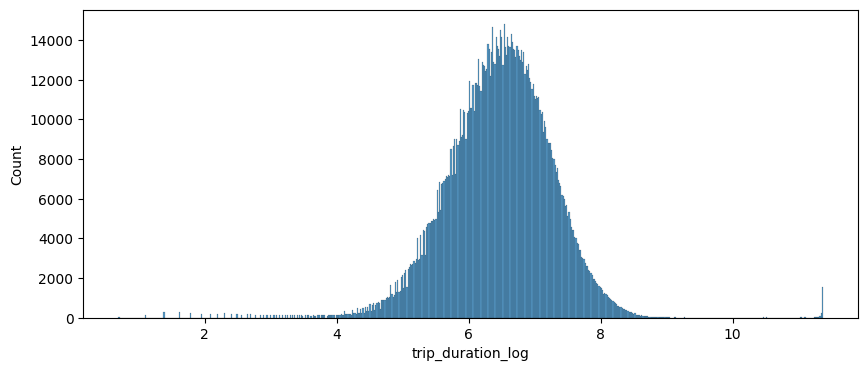

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 4))
sns.histplot(taxi_data, x='trip_duration_log');

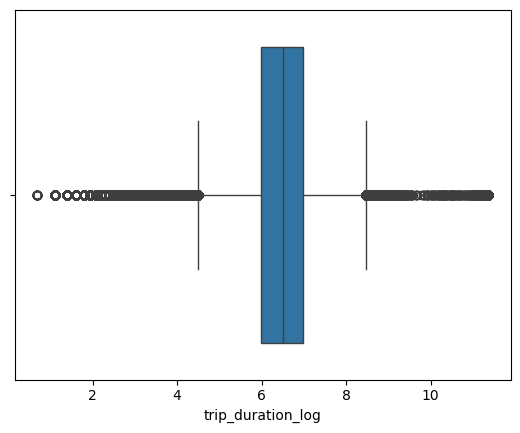

In [ ]:

sns.boxplot(taxi_data, x='trip_duration_log');

In [ ]:
# формируем нулевую и альтернативную гипотезы для проверки данных на нормальность
H0 = 'Данные распределены нормально'
H1 = 'Распределение отлично от нормального'

alpha = 0.05

# тест Д'Агостино (возвращает двустороннюю вероятность для проверки гипотезы)
rez, p = stats.normaltest(taxi_data['trip_duration_log'])

print(f'Статистика теста: {rez}')
print(f'P-value = {round(p, 2)}')


if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(H0)
else:
    print(H1)

Статистика теста: 138350.16605405
P-value = 0.0
Распределение отлично от нормального


### Задание 2.2
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

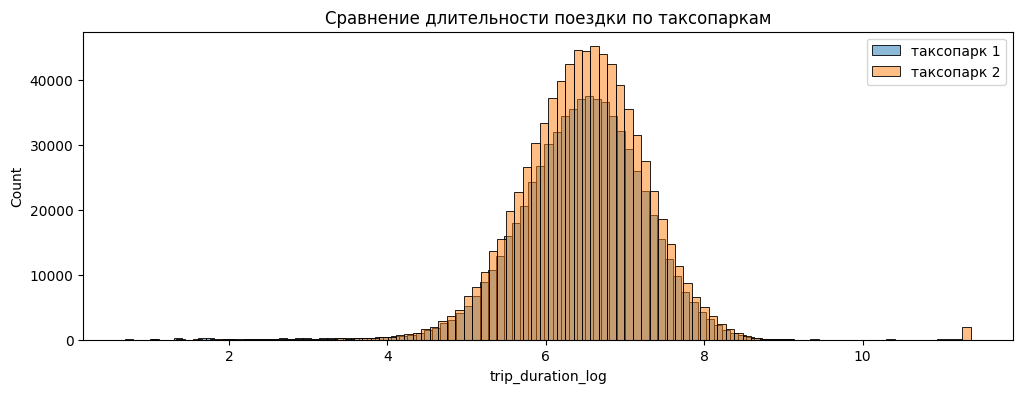

In [ ]:
vendor_1 = taxi_data.query('vendor_id==1')
vendor_2 = taxi_data.query('vendor_id==2')

plt.figure(figsize=(12, 4))
sns.histplot(vendor_1, x='trip_duration_log', bins=100, alpha=0.5, label='таксопарк 1')
sns.histplot(vendor_2, x='trip_duration_log', bins=100, alpha=0.5, label='таксопарк 2')
plt.title('Сравнение длительности поездки по таксопаркам')
plt.legend(loc='upper right');

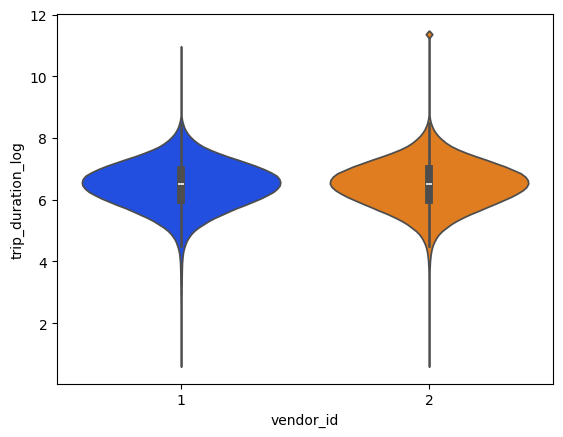

In [ ]:

sns.violinplot(data=taxi_data, y="trip_duration_log", x='vendor_id', palette='bright');

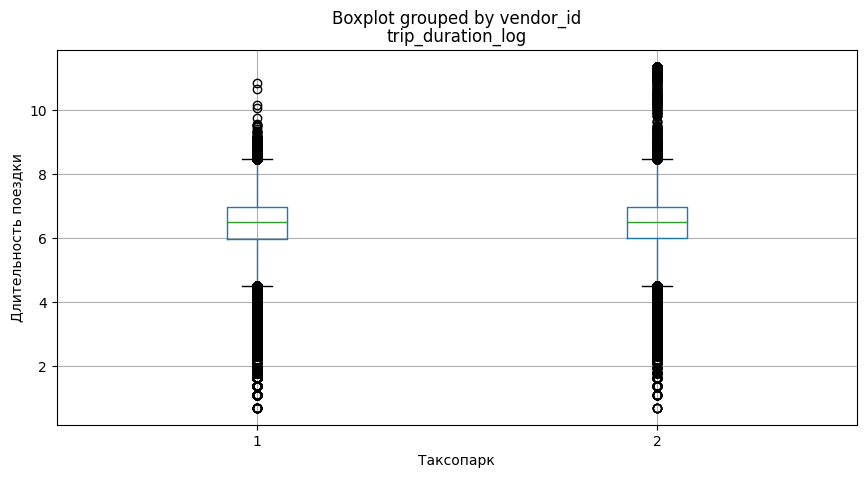

In [ ]:
# распределение длительности поездки в логарифмическом масштабе в зависимости от таксопарка
taxi_data.boxplot(column='trip_duration_log', by='vendor_id', figsize=(10,5))
#plt.title('Распределение длительности поездки в логарифмическом масштабе в зависимости от таксопарка')
plt.ylabel('Длительность поездки')
plt.xlabel('Таксопарк');

### Задание 2.3
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

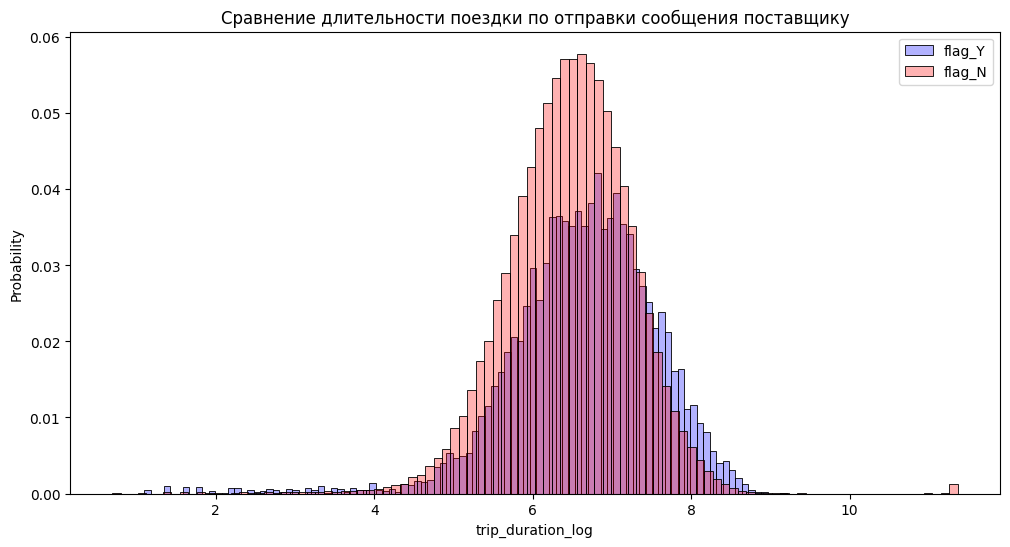

In [ ]:
%matplotlib inline

flag_N = taxi_data.query('store_and_fwd_flag=="N"')
flag_Y = taxi_data.query('store_and_fwd_flag=="Y"')

plt.figure(figsize=(12, 6))

sns.histplot(flag_Y, x='trip_duration_log', bins=100, alpha=0.3, label='flag_Y', color='blue', stat='probability')
sns.histplot(flag_N, x='trip_duration_log', bins=100, alpha=0.3, label='flag_N', color='red', stat='probability')

plt.title('Сравнение длительности поездки по отправки сообщения поставщику')
plt.legend(loc='upper right');
#plt.show();

### Задание 2.4
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

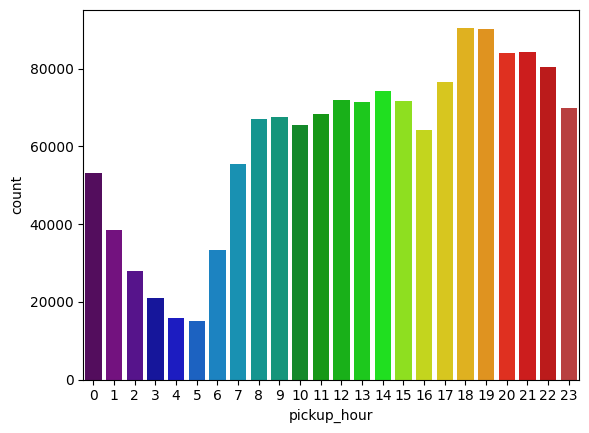

In [ ]:
sns.countplot(
    x='pickup_hour',
    data=taxi_data,
    palette='nipy_spectral'
);

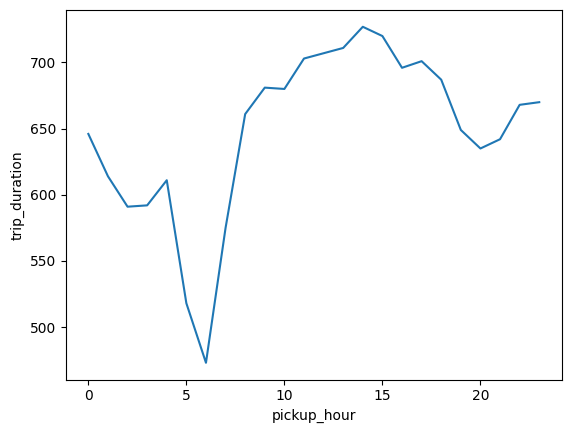

In [ ]:
median_duration_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median().reset_index()

sns.lineplot(x='pickup_hour',
    y='trip_duration',
    data=median_duration_hour);

### Задание 2.5
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?

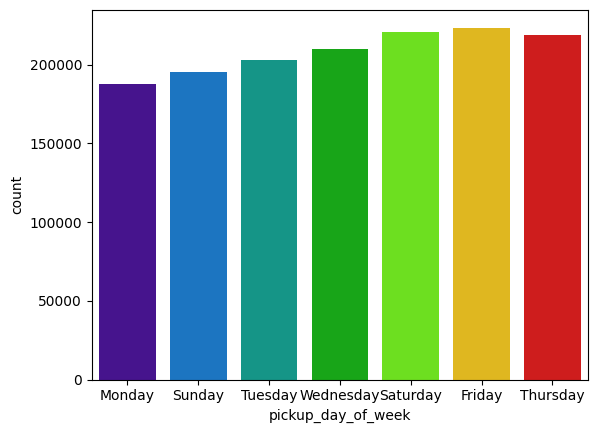

In [ ]:
sns.countplot(
    x='pickup_day_of_week',
    data=taxi_data,
    palette='nipy_spectral'
);

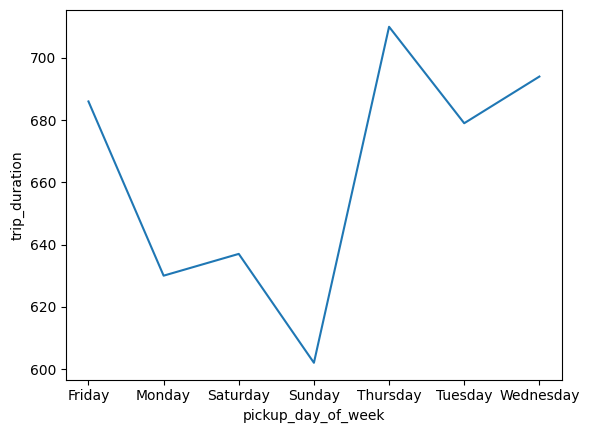

In [ ]:
median_pickup_day_of_week = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median().reset_index()
#median_duration_hour
sns.lineplot(x='pickup_day_of_week',
    y='trip_duration',
    data=median_pickup_day_of_week);

### Задание 2.6
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены дни недели (pickup_day_of_week), по столбцам - часы (pickup_hour), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

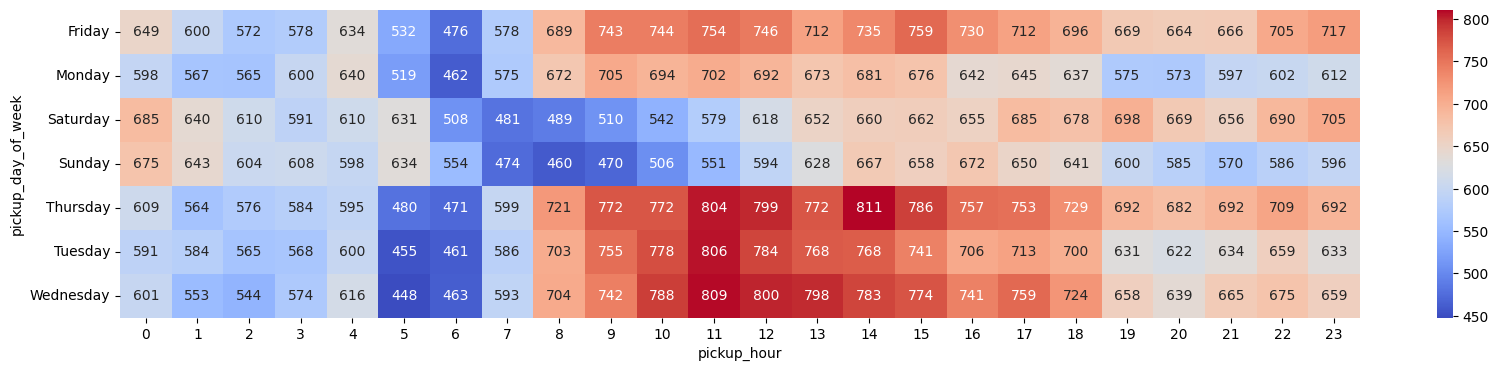

In [ ]:
table = taxi_data.pivot_table(index='pickup_day_of_week', columns='pickup_hour', values='trip_duration', aggfunc='median')

plt.figure(figsize=(20, 4))
ordered_dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
plt.yticks(range(0,7), ordered_dow, rotation='horizontal')
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.0f');

### Задание 2.7
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

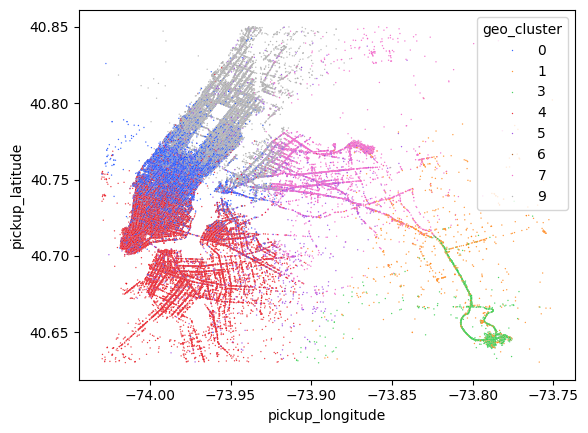

In [ ]:
filter_pickup = taxi_data[(taxi_data['pickup_longitude'] >= -74.03) & (taxi_data['pickup_longitude'] <= -73.75) &
                          (taxi_data['pickup_latitude'] >= 40.63) & (taxi_data['pickup_latitude'] <= 40.85)]

sns.scatterplot(filter_pickup, x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', palette='bright', s=1, alpha=.8)


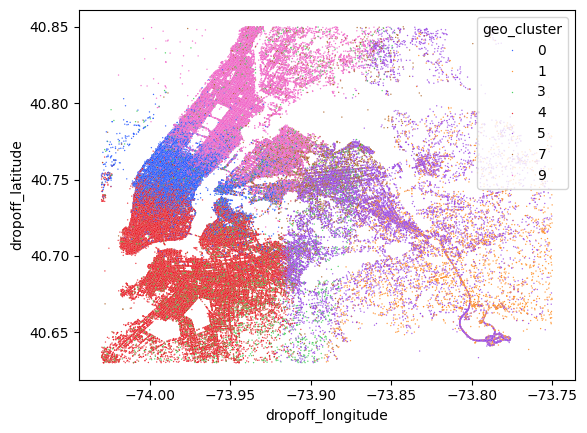

In [ ]:
filter_dropoff = taxi_data[(taxi_data['dropoff_longitude'] >= -74.03) & (taxi_data['dropoff_longitude'] <= -73.75) &
                          (taxi_data['dropoff_latitude'] >= 40.63) & (taxi_data['dropoff_latitude'] <= 40.85)]

sns.scatterplot(filter_dropoff, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', palette='bright', s=1, alpha=.8);

## 3. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [110]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [111]:
all_data = taxi_data.copy()
all_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


## Задание 3.1
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

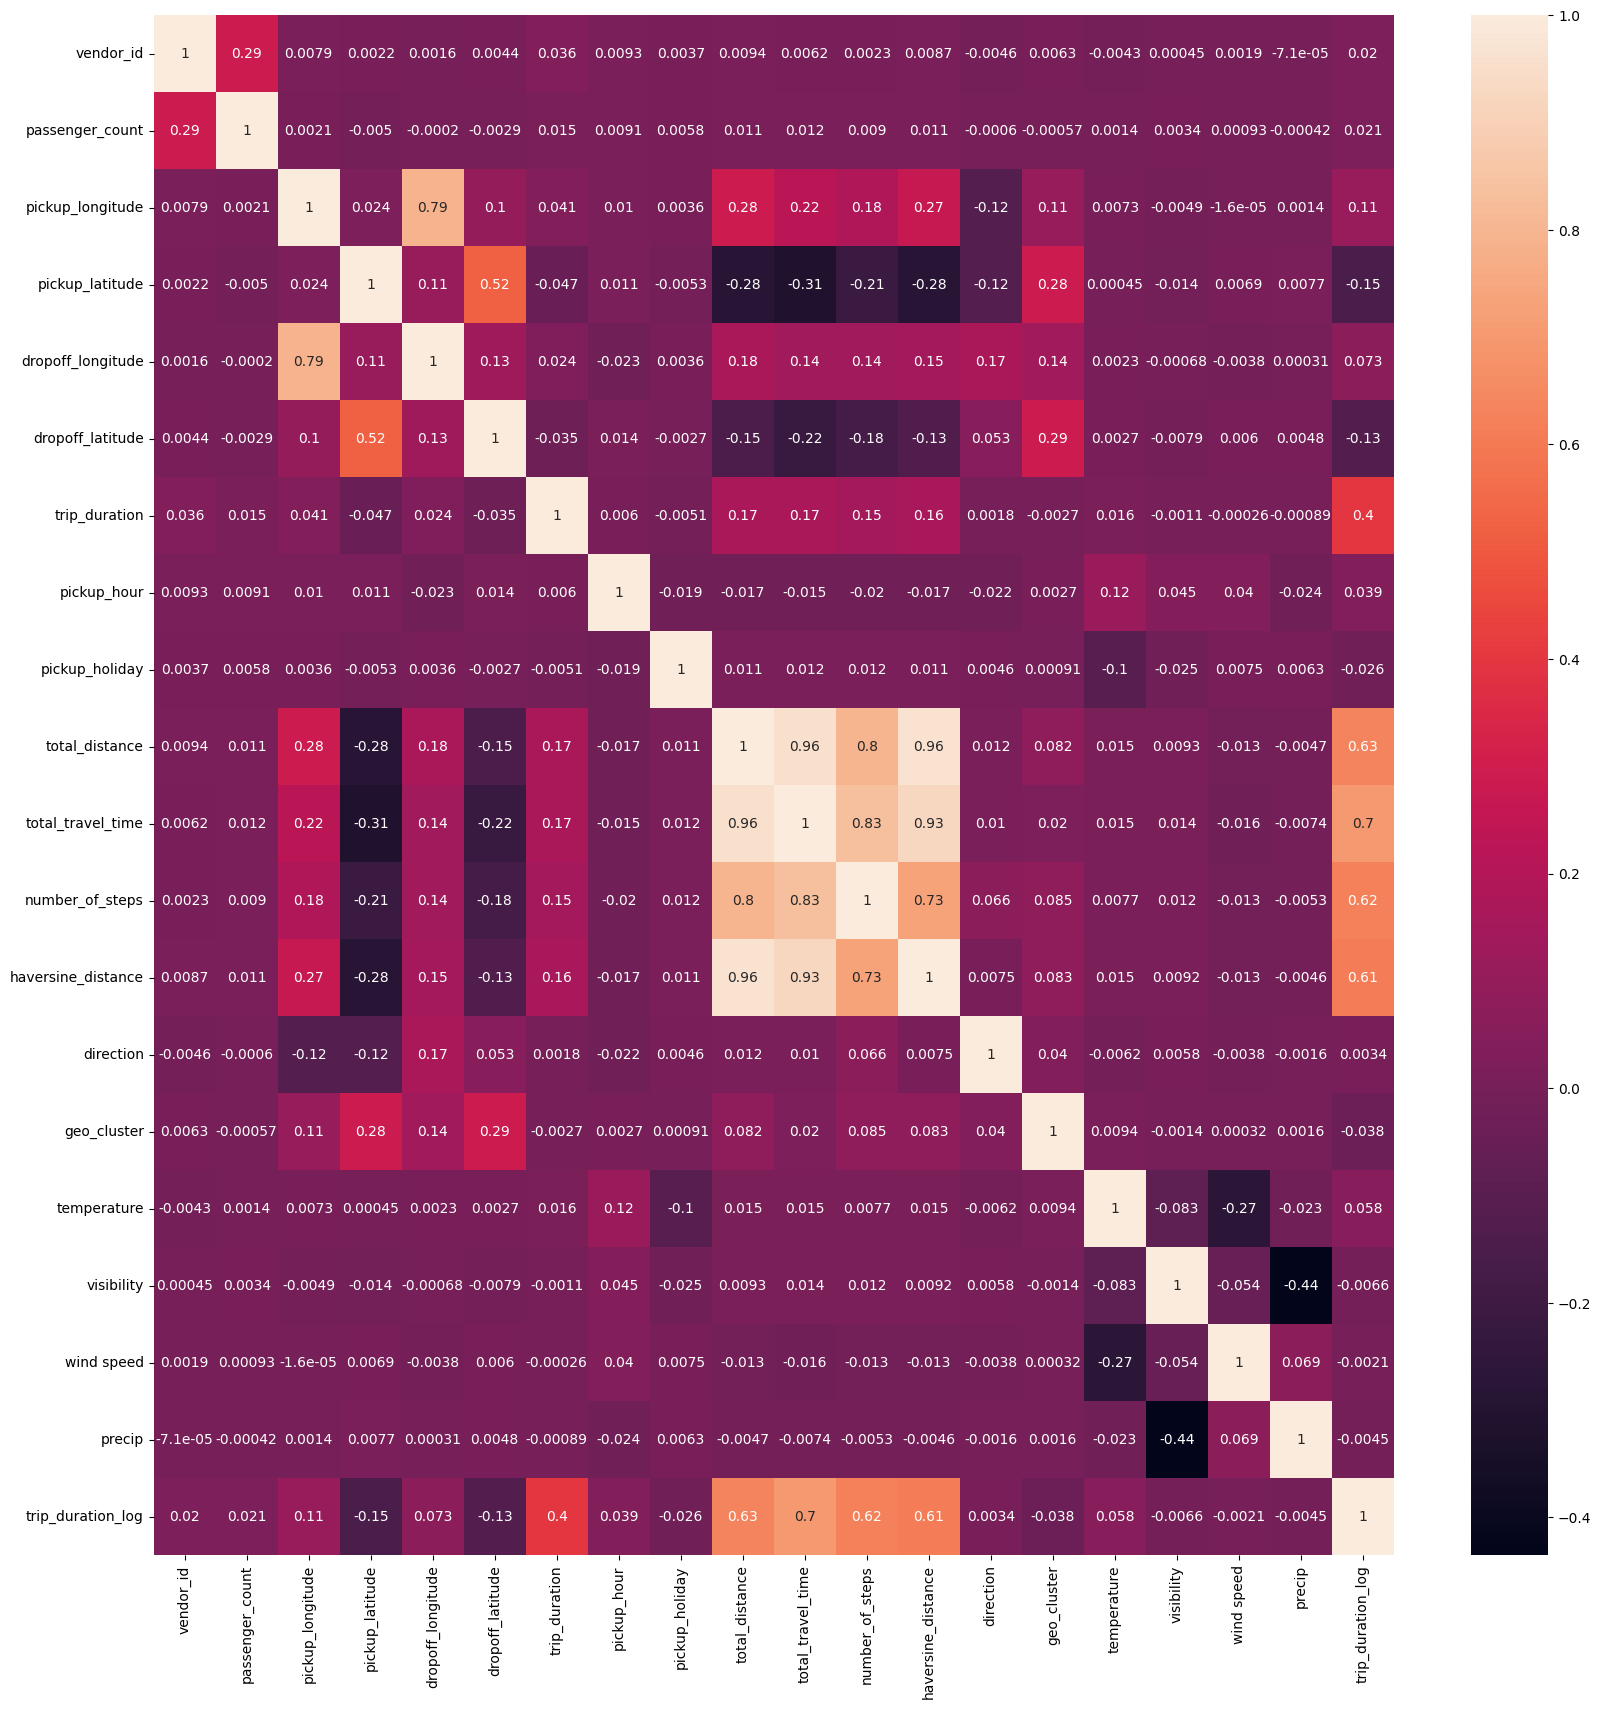

In [112]:
# посмотрим на корреляцию признаков

plt.figure(figsize=(20,20))
sns.heatmap(all_data.corr(numeric_only=True),  annot=True);

In [113]:
#Исключаем уникальные признаки и признаки, создающие утечку данных
all_data = all_data.drop(columns = ['id', 'total_travel_time'], axis=1)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [114]:
drop_columns = ['pickup_datetime', 'pickup_date', 'dropoff_datetime']
all_data = all_data.drop(drop_columns, axis=1)

print('Shape of data:  {}'.format(all_data.shape))

Shape of data:  (1458233, 22)


### Задание 3.2
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 1 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [115]:
# кодировки
all_data['vendor_id'] = all_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
all_data['store_and_fwd_flag'] = all_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Рассчитайте среднее по закодированному столбцу vendor_id
print(round(all_data['vendor_id'].mean(), 2))
# Рассчитайте среднее по закодированному столбцу store_and_fwd_flag
print(round(all_data['store_and_fwd_flag'].mean(), 3))

all_data.head()

0.53
0.006


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,Monday,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,Sunday,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,Tuesday,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,Wednesday,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,Saturday,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 3.3
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, pickup_dropoff_cluster и events в таблице train_data с помощью OneHotEncoder() из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [116]:
all_data.geo_cluster = all_data.geo_cluster.astype('object')

encoder = OneHotEncoder(sparse=False)
categorical = ['pickup_day_of_week', 'events', 'geo_cluster']
ohe = encoder.fit_transform(all_data[categorical])
data_ohe = pd.DataFrame(ohe, columns=encoder.get_feature_names_out(categorical))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
# Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?
print(data_ohe.shape[1] - 3)

18


Добавим полученную таблицу с закодированными признаками:

In [118]:
all_data = pd.concat(
    [all_data.reset_index(drop=True).drop(categorical, axis=1), data_ohe],
    axis=1
)
print('Shape of data: {}'.format(all_data.shape))

Shape of data: (1458233, 40)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [119]:
X = all_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = all_data['trip_duration']
y_log = all_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобъем выборку на обучающую и валидационную в соотношении 67/33:

In [120]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, test_size=0.33, random_state=42)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


## Задание 3.4
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [121]:
selector = SelectKBest(score_func=f_regression, k=25).fit(X_train, y_train_log)
best_features = selector.get_feature_names_out()
print(best_features)

# оставляем лучшие признаки
X_train = X_train[best_features]
X_valid = X_valid[best_features]

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'number_of_steps' 'haversine_distance'
 'temperature' 'pickup_day_of_week_Friday' 'pickup_day_of_week_Monday'
 'pickup_day_of_week_Saturday' 'pickup_day_of_week_Sunday'
 'pickup_day_of_week_Thursday' 'pickup_day_of_week_Tuesday'
 'pickup_day_of_week_Wednesday' 'geo_cluster_0' 'geo_cluster_3'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 3.5
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [122]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [123]:
# Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки
X_valid[:,0].mean().round(2)

X_train = pd.DataFrame(X_train, columns=best_features)
X_valid = pd.DataFrame(X_valid, columns=best_features)

## 4. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 4.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [124]:
#таблица для сбора метрик
model_score = pd.DataFrame(columns = ['model', 'rmsle_train', 'rmsle_valid'])

In [57]:
model_lr =  LinearRegression()
model_lr.fit(X_train, y_train_log)

p_lr_train = model_lr.predict(X_train)
p_lr_valid = model_lr.predict(X_valid)

# получение метрик
score_lr_train = np.sqrt(mean_squared_error(y_train_log, p_lr_train)).round(2)
score_lr_valid = np.sqrt(mean_squared_error(y_valid_log, p_lr_valid)).round(2)
print('RMSLE на тренировочной выборке:', score_lr_train)
print('RMSLE на валидационной выборке:', score_lr_valid)

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'LinearRegression', 'rmsle_train': score_lr_train, 'rmsle_valid': score_lr_valid}])
model_score = pd.concat([df, model_score], ignore_index=True)

RMSLE на тренировочной выборке: 0.57
RMSLE на валидационной выборке: 0.57


### Задание 4.2
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [58]:
model_tree =  DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train_log)

p_tree_train = model_tree.predict(X_train)
p_tree_valid = model_tree.predict(X_valid)

# получение метрик
score_tree_train = np.sqrt(mean_squared_error(y_train_log, p_tree_train)).round(2)
score_tree_valid = np.sqrt(mean_squared_error(y_valid_log, p_tree_valid)).round(2)
print('RMSLE на тренировочной выборке:', score_tree_train)
print('RMSLE на валидационной выборке:', score_tree_valid)

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'DecisionTreeRegressor', 'rmsle_train': score_tree_train, 'rmsle_valid': score_tree_valid}])
model_score = pd.concat([df, model_score], ignore_index=True)

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.57


### Задание 4.3
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


Глубина дерева: 12
RMLSE на треннировочной выборке: 0.41
RMLSE на валидационной выборке: 0.43


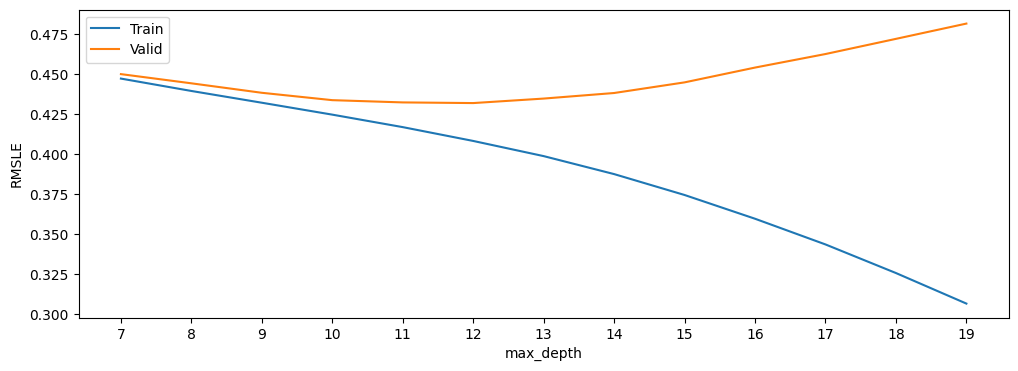

In [59]:
# поиск наилучших параметров для модели DecisionTreeRegressor

score_train = []
score_valid = []
max_depth = range(7, 20)

for depth in max_depth:
    # создание объекта класса и обучение
    model_tree = DecisionTreeRegressor(random_state=42, max_depth=depth)
    model_tree.fit(X_train, y_train_log)
    # получение предсказаний
    p_tree_train = model_tree.predict(X_train)
    p_tree_valid = model_tree.predict(X_valid)
    # рассчет RMSLE и добавление в списки
    score_train.append(np.sqrt(mean_squared_error(y_train_log, p_tree_train)))
    score_valid.append(np.sqrt(mean_squared_error(y_valid_log, p_tree_valid)))

# визуализация изменения RMSLE
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(max_depth, score_train, label='Train')
ax.plot(max_depth, score_valid, label='Valid')
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSLE')
ax.set_xticks(max_depth)
ax.legend();

best_index = score_valid.index(min(score_valid))

print("Глубина дерева:", max_depth[best_index])
print("RMLSE на треннировочной выборке:", (score_train[best_index]).round(2))
print("RMLSE на валидационной выборке:", (score_valid[best_index]).round(2))

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'DecisionTreeRegressor_best', 'rmsle_train': (score_train[best_index]).round(2),
                    'rmsle_valid': (score_valid[best_index]).round(2)}])
model_score = pd.concat([df, model_score], ignore_index=True)

## 5. Решение задачи регрессии: ансамблевые методы и построение прогноза

### Задание 5.1

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
model_forest = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=12, min_samples_split=20, criterion='squared_error')
model_forest.fit(X_train, y_train_log)

p_forest_train = model_forest.predict(X_train)
p_forest_valid = model_forest.predict(X_valid)

score_forest_train = np.sqrt(mean_squared_error(y_train_log, p_forest_train)).round(2)
score_forest_valid = np.sqrt(mean_squared_error(y_valid_log, p_forest_valid)).round(2)

print('RMSLE на тренировочной выборке', score_forest_train)
print('RMSLE на валидационной выборке', score_forest_valid)

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'RandomForestRegressor', 'rmsle_train': score_forest_train, 'rmsle_valid': score_forest_valid}])
model_score = pd.concat([df, model_score], ignore_index=True)

RMSLE на тренировочной выборке 0.4
RMSLE на валидационной выборке 0.42


### Задание 5.2
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [61]:
# GradientBoostingRegressor
model_boost = GradientBoostingRegressor(random_state=42, learning_rate=0.5, n_estimators=20, max_depth=6, min_samples_split=30)
model_boost.fit(X_train, y_train_log)
p_boost_train = model_boost.predict(X_train)
p_boost_valid = model_boost.predict(X_valid)

score_boost_train = np.sqrt(mean_squared_error(y_train_log, p_boost_train)).round(2)
score_boost_valid = np.sqrt(mean_squared_error(y_valid_log, p_boost_valid)).round(2)

print('RMSLE на тренировочной выборке', score_boost_train)
print('RMSLE на валидационной выборке', score_boost_valid)

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'GradientBoostingRegressor', 'rmsle_train': score_boost_train, 'rmsle_valid': score_boost_valid}])
model_score = pd.concat([df, model_score], ignore_index=True)

RMSLE на тренировочной выборке 0.4
RMSLE на валидационной выборке 0.41


In [125]:
#CatBoost
# подбор гиперпараметров
def optuna_cb(trial):
  iterations = trial.suggest_int('iterations', 50, 200, 1)
  depth = trial.suggest_int('depth', 3, 7, 1)
  min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 2, 10, 1)

  model_cat = CatBoostRegressor(iterations=iterations,
                            depth=depth,
                            min_data_in_leaf=min_data_in_leaf,
                            random_state=42, silent=True) #verbose=False
  model_cat.fit(X_train, y_train_log)
  score = mean_squared_error(y_train_log, model_cat.predict(X_train))

  return score

# обучение модели с наилучшими гиперпараметрами
study = optuna.create_study()

study.optimize(optuna_cb, n_trials=10)
model_cat = CatBoostRegressor(**study.best_params, random_state=42, verbose=False)
model_cat.fit(X_train, y_train_log)
p_cat_train = model_cat.predict(X_train)
p_cat_valid = model_cat.predict(X_valid)

score_cat_train = (mean_squared_error(y_train_log, p_cat_train) ** 0.5).round(2)
score_cat_valid = (mean_squared_error(y_valid_log, p_cat_valid) ** 0.5).round(2)

print(study.best_params)
print('RMSLE CatBoost на тренировочной выборке:', score_cat_train)
print('RMSLE CatBoost на валидационой выборке:', score_cat_valid)

# добавление результатов в таблицу
df = pd.DataFrame([{'model': 'CatBoostRegressor', 'rmsle_train': score_cat_train, 'rmsle_valid': score_cat_valid}])
model_score = pd.concat([df, model_score], ignore_index=True)

[I 2024-05-22 11:33:51,800] A new study created in memory with name: no-name-d32c98d1-15a4-4bcf-a364-e87d9bfc55a5
<ipython-input-125-22f03f1b6b97>:4: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  iterations = trial.suggest_int('iterations', 50, 200, 1)
<ipython-input-125-22f03f1b6b97>:5: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  depth = trial.suggest_int('depth', 3, 7, 1)
<ipython-input-125-22f03f1b6b97>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 2, 10, 1)
[I 2024-05-22 11:34:29,351] Trial 0 finished with value: 0.15558962880533708 and parameters: {'iterations': 180, 'depth': 5, 'min_data_in_leaf': 7}. Best is trial 0 with value: 0.15558962880533708.
<ipython-input-125-22f03f1b6b97>:4: F

{'iterations': 144, 'depth': 7, 'min_data_in_leaf': 9}
RMSLE CatBoost на тренировочной выборке: 0.39
RMSLE CatBoost на валидационой выборке: 0.4


### Задание 5.3
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений
* Catboost


In [63]:
model_score

,model,rmsle_train,rmsle_valid
0,CatBoostRegressor,0.39,0.40
1,GradientBoostingRegressor,0.40,0.41
2,GradientBoostingRegressor,0.40,0.41
3,DecisionTreeRegressor_best,0.41,0.43
4,DecisionTreeRegressor,0.00,0.57
5,LinearRegression,0.57,0.57


### Задание 5.4
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


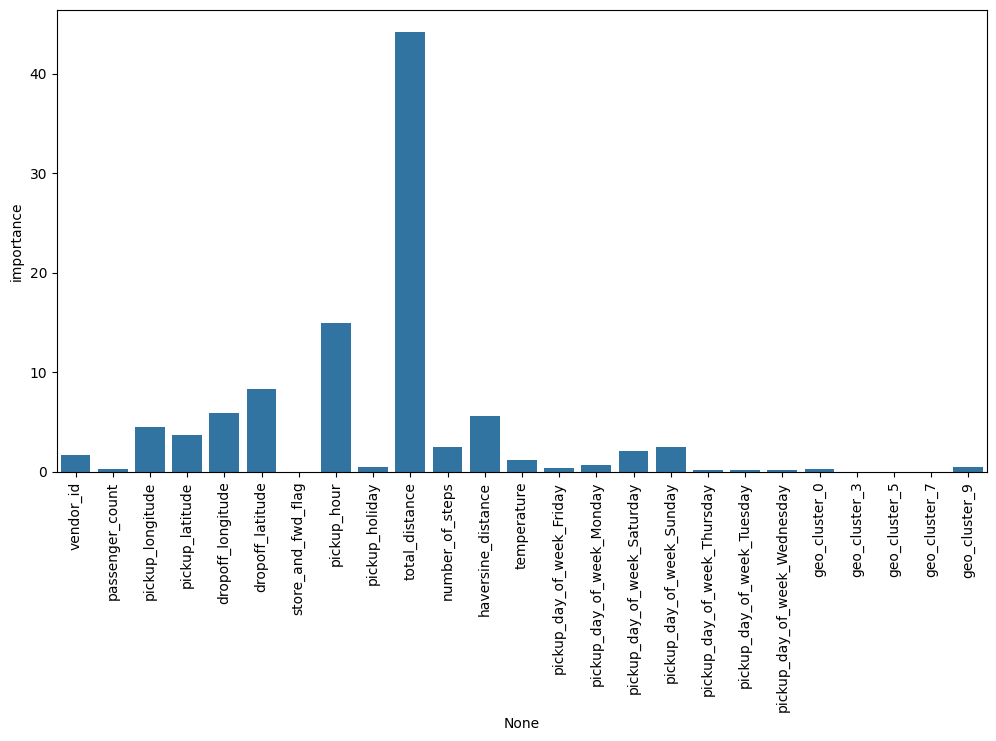

In [64]:
fig, ax = plt.subplots(figsize = (12, 6))
features = X_train.columns
importances = model_cat.feature_importances_

sns.barplot(x=features, y=importances, ax=ax)
ax.set_ylabel('importance')
plt.xticks(rotation='vertical');

### Задание 5.5
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [126]:
# перевод из логарифмического масштаба в истинный
p_valid = np.exp(p_cat_valid) - 1
y_valid = np.exp(y_valid_log) - 1

mae = median_absolute_error(y_valid, p_valid)

# вывод метрики в минутах
print('MAE на валидационной выборке:', (mae / 60).round(1), 'мин')

MAE на валидационной выборке: 1.8 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [31]:
! gdown 1yhzDK1ejcyCbSDBfI3QqxI_vx1bpOQG2
! gdown 1wCoS-yOaKFhd1h7gZ84KL9UwpSvtDoIA

Downloading...
From: https://drive.google.com/uc?id=1yhzDK1ejcyCbSDBfI3QqxI_vx1bpOQG2
To: /content/test.zip
100% 21.3M/21.3M [00:00<00:00, 35.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1wCoS-yOaKFhd1h7gZ84KL9UwpSvtDoIA
From (redirected): https://drive.google.com/uc?id=1wCoS-yOaKFhd1h7gZ84KL9UwpSvtDoIA&confirm=t&uuid=93b2e078-91d4-44ec-bc30-9a9003cb4132
To: /content/Project5_osrm_data_test.zip
100% 76.7M/76.7M [00:04<00:00, 18.9MB/s]


In [32]:
! unzip /content/test.zip

Archive:  /content/test.zip
  inflating: test.csv                


In [127]:
test_data = pd.read_csv("/content/test.csv")
osrm_data_test = pd.read_csv("/content/Project5_osrm_data_test.zip")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [128]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data['pickup_date']=pd.to_datetime(test_data['pickup_date'],format='%Y-%m-%d')
test_data = test_data.merge(holiday['date'], how='left', left_on='pickup_date', right_on='date')
test_data['pickup_holiday'] = test_data.apply(add_holiday_features, axis=1)
test_data = test_data.drop('date', axis=1)

test_data = test_data.merge(osrm_data_test[['id', 'total_distance', 'total_travel_time', 'number_of_steps']],
                            how='left', on='id')

test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)

test_data = add_weather_features(test_data, weather)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

test_data_onehot = encoder.fit_transform(test_data[categorical]) #.toarray()
column_names = encoder.get_feature_names_out(categorical)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(categorical, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [132]:
# предсказание на тестовой выборке
p_cat_test = model_cat.predict(X_test)
# перевод из логарифмического масштаба в истинный
p_test = np.exp(p_cat_test) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': p_test})
submission.to_csv('/content/submission_cb.csv', index=False)